In [5]:
import pandas as pd
df=pd.read_csv("C:/Users/gosha/Анализ строительной отрасли/df_final.csv") 
df = df.sort_values(by='Доход 2024', ascending=False)
df.reset_index(drop=True, inplace=True)
df.tail(10)

,Наименование / ФИО,Тип субъекта,Категория,ИНН,Основной вид деятельности,Регион,Район,Город,Населенный пункт,Нематериальные активы 2024,...,Основные средства 2024,Основные средства 2023,Доходные вложения 2024,Доходные вложения 2023,Доход 2024,Доход 2023,Амортизация НМА(приблизительно),Амортизация вся(приблизительно),ebita,ebitda
7402,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РУСС...",Юридическое лицо,Малое предприятие,1435290530,41.20 Строительство жилых и нежилых зданий,14 - Республика Саха (Якутия),NaN,г Якутск,NaN,0,...,21738,6943,0,0,-323622,341901,0,14795,-323622,-308827
7403,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДАРС...",Юридическое лицо,Среднее предприятие,7327031144,41.20 Строительство жилых и нежилых зданий,73 - Ульяновская область,NaN,г Ульяновск,NaN,0,...,37875,40034,0,0,-337604,16508,0,0,-337604,-339763
7404,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",Юридическое лицо,Малое предприятие,6670379868,41.20 Строительство жилых и нежилых зданий,77 - г.Москва,NaN,NaN,NaN,0,...,163458,6413,0,0,-347061,1543962,0,157045,-347061,-190016
7405,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГЕНП...",Юридическое лицо,Малое предприятие,7802199601,41.20 Строительство жилых и нежилых зданий,78 - г.Санкт-Петербург,NaN,NaN,NaN,0,...,423718,171974,399,195,-347394,960212,0,251948,-347394,-95446
7406,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СПЕЦИ...,Юридическое лицо,Среднее предприятие,1659143147,41.20 Строительство жилых и нежилых зданий,16 - Республика Татарстан (Татарстан),NaN,г Казань,NaN,0,...,374,352,0,0,-356485,1991094,0,22,-356485,-356463
7407,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БУРЯ...",Юридическое лицо,Среднее предприятие,326525490,41.20 Строительство жилых и нежилых зданий,03 - Республика Бурятия,NaN,г Улан-Удэ,NaN,8,...,28772,48982,0,0,-357355,1134981,8,0,-357347,-377557
7408,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РР-С...",Юридическое лицо,Среднее предприятие,7801502492,41.20 Строительство жилых и нежилых зданий,78 - г.Санкт-Петербург,NaN,NaN,NaN,0,...,1137,1161,0,0,-378381,344572,0,0,-378381,-378405
7409,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СТРОИ...,Юридическое лицо,Малое предприятие,7451422174,41.20 Строительство жилых и нежилых зданий,74 - Челябинская область,NaN,г Челябинск,NaN,0,...,116878,47544,0,0,-407756,628744,0,69334,-407756,-338422
7410,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭВРИАЛ""",Юридическое лицо,Среднее предприятие,5012061335,41.20 Строительство жилых и нежилых зданий,77 - г.Москва,NaN,г Зеленоград,NaN,244,...,36132,103976,0,0,-475366,1049531,0,0,-475381,-543225
7411,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""А1""",Юридическое лицо,Малое предприятие,7708262060,41.20 Строительство жилых и нежилых зданий,77 - г.Москва,NaN,NaN,NaN,21,...,0,0,43849,30626,-1722622,1108933,0,13223,-1722622,-1709399


In [6]:
addresses=[]
for i in range(0,500):
    addr=str(df.iloc[i,5])+", "+ str(df.iloc[i,7])
    addr=addr[4:]
    addr=addr.replace(" г "," ")
    #addr=addr.replace(" г"," ")
    addr=addr.replace("nan"," ")
    addresses.append(addr)

In [25]:
lat=[]
lon=[]
from geopy.geocoders import Nominatim
for i in addresses:
    
    geolocator = Nominatim(user_agent="my_geocoder")
    address = i
    location = geolocator.geocode(address)
    
    if location:
        lat.append(location.latitude)
        lon.append(location.longitude)
    else:
        print("Адрес не найден")


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=+%D0%A1%D0%B2%D0%B5%D1%80%D0%B4%D0%BB%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C%2C+%D0%91%D0%B5%D1%80%D0%B5%D0%B7%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9&format=json&limit=1 (Caused by ConnectTimeoutError(<HTTPSConnection(host='nominatim.openstreetmap.org', port=443) at 0x221923731a0>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [ ]:
points=points.pop(323)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os

shp = "C:/Users/gosha/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

world = gpd.read_file(shp)
russia = world[world['SOVEREIGNT'] == 'Russia']
points = [Point(long, latt) for long, latt in zip(lon, lat)]
gdf_points = gpd.GeoDataFrame(geometry=points[:323], crs="EPSG:4326")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
russia.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)

gdf_points.plot(ax=ax, color='red', markersize=50, alpha=0.7, edgecolor='darkred', linewidth=1)

ax.set_xlim([20, 190])
ax.set_ylim([40, 82])

plt.title('Города на карте России', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

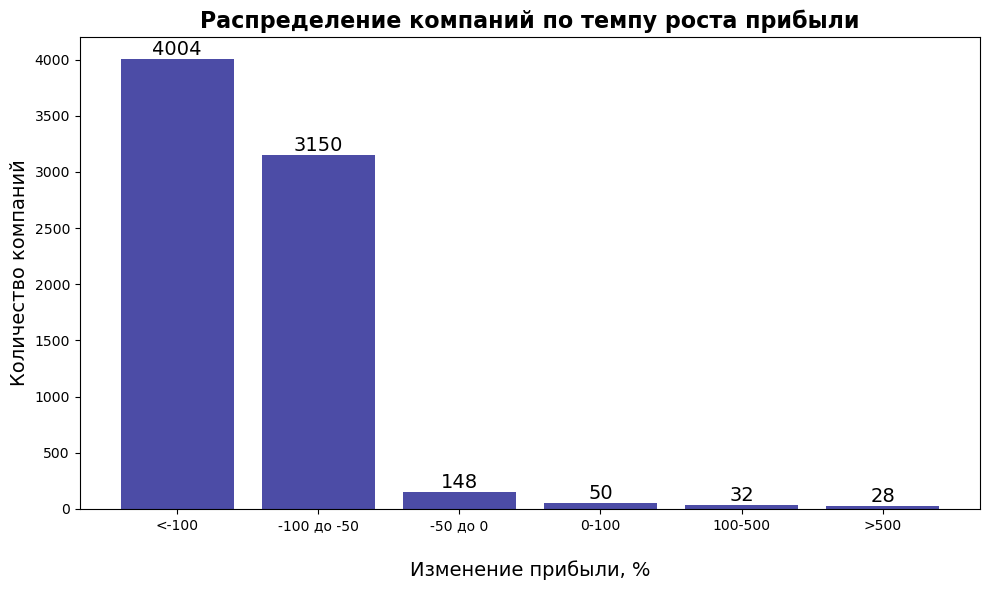

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df['Процент изменения'] = ((df['Доход 2024'] - df['Доход 2023']) / df['Доход 2023']) * 100

bins = [-float('inf'), -100, -50, 0, 100, 500, float('inf')]
labels = ['<-100', '-100 до -50', '-50 до 0', '0-100', '100-500', '>500']

df['Изменение прибыли'] = pd.cut(df['Процент изменения'], bins=bins, labels=labels)


profit_change_counts = df['Изменение прибыли'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(profit_change_counts.index, profit_change_counts.values, color='navy', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontsize=14)

ax.set_xlabel('\nИзменение прибыли, %', fontsize=14)
ax.set_ylabel('Количество компаний', fontsize=14)
ax.set_title('Распределение компаний по темпу роста прибыли', fontsize=16, fontweight='bold')

plt.xticks(rotation=0,ha='center')
ax.grid(False)

plt.tight_layout()
plt.show()

C:\Users\gosha\AppData\Local\Temp\ipykernel_12400\25502740.py:15: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, y='Регион', x='Средняя прибыль', hue='Регион', palette=sns.light_palette("navy", n_colors=15, reverse=True), orient='h')


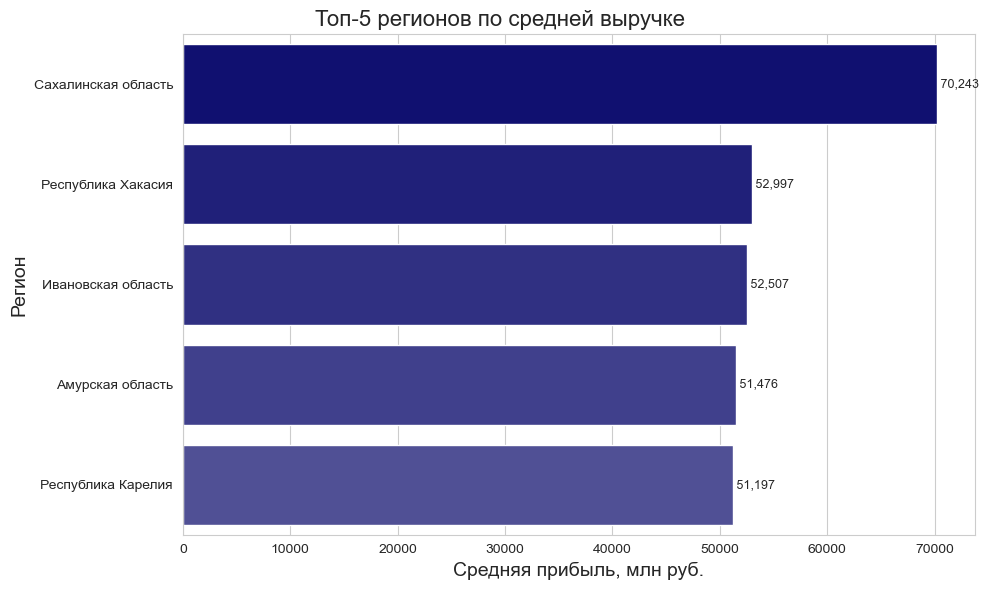

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_regions = (df.groupby('Регион')['Доход 2024'].mean().sort_values(ascending=True).tail(5).sort_values(ascending=False))


plot_df = pd.DataFrame({
    'Регион': top_regions.index.str.replace(r'^\d+\s*-\s*', '', regex=True),
    'Средняя прибыль': top_regions.values
})

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=plot_df, y='Регион', x='Средняя прибыль', hue='Регион', palette=sns.light_palette("navy", n_colors=15, reverse=True), orient='h')

plt.title('Топ-5 регионов по средней выручке', fontsize=16, x=0.4)
plt.xlabel('Средняя прибыль, млн руб.',fontsize=14)
plt.ylabel('Регион',fontsize=14)

for i, v in enumerate(plot_df['Средняя прибыль']):
    plt.text(v, i, f' {v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [18]:
all_profit = df.loc[df['Доход 2024'] > 0, 'Доход 2024'].sum()
CRn5 = df.loc[df['Доход 2024'] > 0, 'Доход 2024'].head(5).sum()/all_profit
CRn10 = df.loc[df['Доход 2024'] > 0, 'Доход 2024'].head(10).sum()/all_profit
CRn20 = df.loc[df['Доход 2024'] > 0, 'Доход 2024'].head(20).sum()/all_profit
CRn50 = df.loc[df['Доход 2024'] > 0, 'Доход 2024'].head(50).sum()/all_profit
CRn100 = df.loc[df['Доход 2024'] > 0, 'Доход 2024'].head(100).sum()/all_profit
print(CRn5,CRn10,CRn20,CRn50,CRn100)

0.08529813470316829 0.12234529390711411 0.17353532335929414 0.2729457036575058 0.3808358234212962


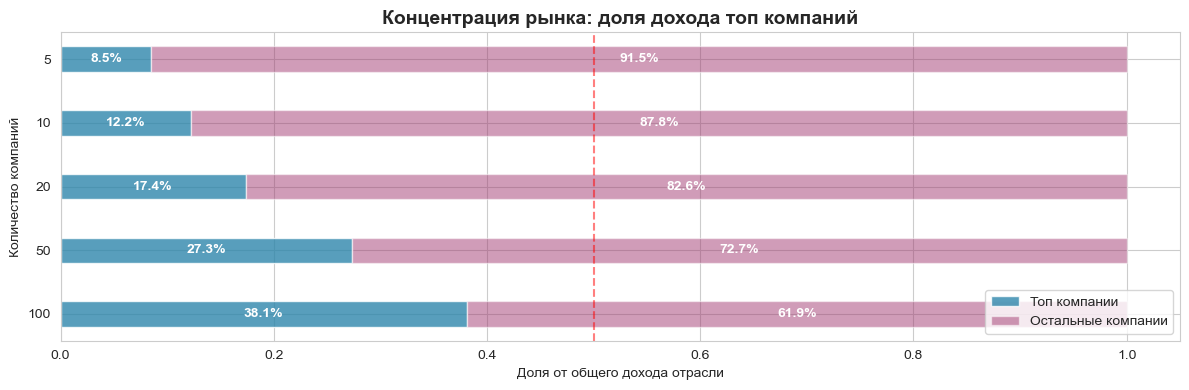

In [23]:
import matplotlib.pyplot as plt
import numpy as np

count = ['100','50','20', '10', '5']
value = [CRn100, CRn50, CRn20, CRn10, CRn5]
remain = [1 - v for v in values]

fig, ax = plt.subplots(figsize=(12, 4))

bar_height = 0.4
y_pos = np.arange(len(labels))
bars1 = ax.barh(y_pos, value, height=bar_height, label='Топ компании', color='#2E86AB', alpha=0.8)

bars2 = ax.barh(y_pos, remain, height=bar_height, left=values, 
                label='Остальные компании', color='#A23B72', alpha=0.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(count)
ax.set_xlabel('Доля от общего дохода отрасли')
ax.set_ylabel('Количество компаний')
ax.set_title('Концентрация рынка: доля дохода топ компаний', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')

for i, (v1, v2) in enumerate(zip(values, remaining)):
    ax.text(v1/2, i, f'{v1:.1%}', ha='center', va='center', color='white', fontweight='bold')
    ax.text(v1 + v2/2, i, f'{v2:.1%}', ha='center', va='center', color='white', fontweight='bold')

ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='50% рынка')

plt.tight_layout()
plt.show()